In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import utils, wave, propagator

m = 1
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

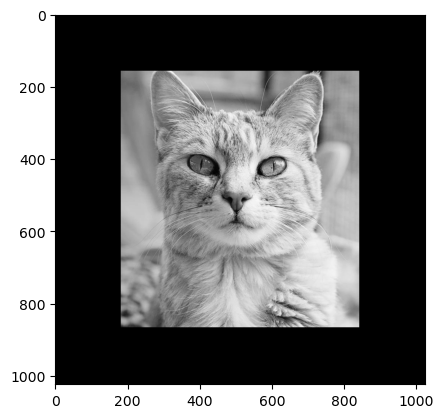

In [22]:
a = Image.open('cat.jpg').convert('L')
a = np.array(a)
a = utils.Padder.pad_image(a)
M, N = a.shape
plt.imshow(a, 'gray')

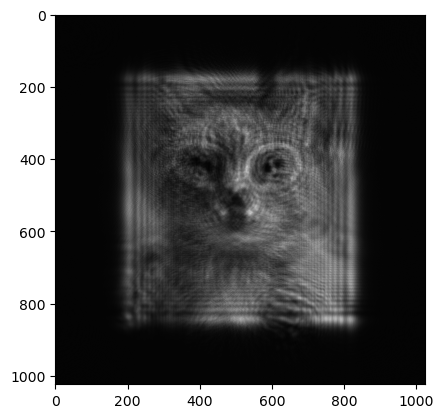

In [36]:
source_resolution = 25*um
lam = 633*nm
z = 1*m

fresnel, dx = propagator.Fresnel_propagator.propagate(a, source_resolution, lam, z)
fresnel = fresnel / np.sum(np.abs(fresnel)) * N * N
plane = wave.Plane.get_wave((N,N), resolution=dx, lam=lam, theta_degree=0.1)
hologram = np.abs(fresnel + 0.5*plane)**2

#hologram = utils.Resizer.resize(hologram, original_resolution=dx, target_resolution=5*um)
# hologram = hologram/np.sum(hologram) * N * N
plt.imshow(hologram, 'gray')

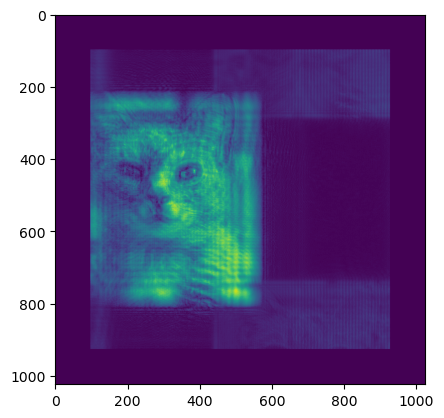

In [37]:
recon_plane = wave.Plane.get_wave(shape=(N, N), resolution=5*um, lam=lam, theta_degree=0.1)
recon = hologram * recon_plane
recon, dx1 = propagator.Fresnel_propagator.propagate(recon, source_resolution=5*um, lam=lam, z=0.05*m)
plt.imshow(np.abs(recon))